# Исследование данных сервиса аренды самокатов GoFast.

**Заказчик** - сервис аренды самокатов GoFast.

**Задача** - проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

**План работы**:
1. Загрузка и описание данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез
7. ВЫВОД

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


# 1. Загрузка и описание данных.

У нас имеется 3 датасета: пользователи, поездки и подписки. Откроем их, сохраним в датафреймы и изучим основную информацию:

In [2]:
users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В датафрейме **users** (пользователи) всего 1565 записей и есть следующая информация:
- user_id	- уникальный идентификатор пользователя
- name	- имя пользователя
- age	- возраст
- city	- город
- subscription_type	- тип подписки (free, ultra)

In [4]:
rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [5]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В датафрейме **rides** (поездки) всего 18068 записей и следующая информация:
- user_id	- уникальный идентификатор пользователя
- distance	- расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	- продолжительность сессии (в минутах)
- date	- дата совершения поездки

In [6]:
subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


В датафрейме **subscriptions** (подписки) всего 2 строки и следующая информация:
- subscription_type	- тип подписки
- minute_price	- стоимость одной минуты поездки по данной подписке
- start_ride_price	- стоимость начала поездки
- subscription_fee	- стоимость ежемесячного платежа

# 2. Предобработка данных

Для начала проверим все фреймы на наличие пропущенных значений:

In [8]:
print(users.isna().sum())
print()
print(rides.isna().sum())
print()
print(subscriptions.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Пропусков нет, хорошо. Посмотрим на наличие дубликатов:

In [9]:
print(users.duplicated().sum())
print(rides.duplicated().sum())
print(subscriptions.duplicated().sum())

31
0
0


Явные дубликаты есть только в **Пользователях**, их мы можем удалить

In [10]:
users = users.drop_duplicates()

В датафрейме **Поездки** приведём столбец date к типу даты pandas и добавим столбец с номером месяца:

In [11]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides['date_month'] = rides['date'].dt.month
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18068 non-null  int64         
 1   distance    18068 non-null  float64       
 2   duration    18068 non-null  float64       
 3   date        18068 non-null  datetime64[ns]
 4   date_month  18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB


# 3. Исследовательский анализ данных

Изучим и визуализируем информацию о пользователях и поездках. Начнём с городов: сколько их в датафрейме, количество пользователей в каждом городе:

In [12]:
print(len(users['city'].unique()))
users.value_counts('city')

8


city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

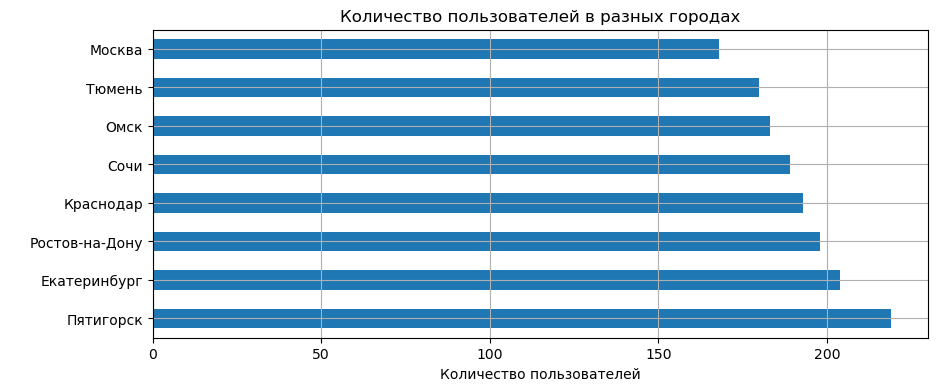

In [13]:
users['city'].value_counts().plot(kind = 'barh', figsize=(10, 4));
plt.grid()
plt.xlabel('Количество пользователей')
plt.ylabel(' ')
plt.title('Количество пользователей в разных городах');

Разброс не очень большой, больше всего у нас пользователей в Пятигорске, меньше всего в Москве. Посмотрим, сколько пользователей с подпиской и без:

In [14]:
users.value_counts('subscription_type')

subscription_type
free     835
ultra    699
Name: count, dtype: int64

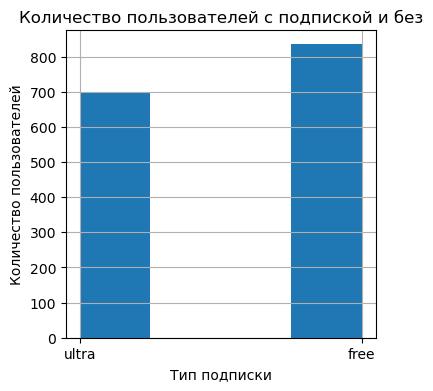

In [15]:
users['subscription_type'].hist(bins=2*2, figsize=(4, 4));
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')
plt.title('Количество пользователей с подпиской и без');

Пользователей без подписки чуть больше - 835 против 699. Посмотрим на возраст пользователей:

In [16]:
print(users['age'].describe())
users.value_counts('age')

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


age
25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: count, dtype: int64

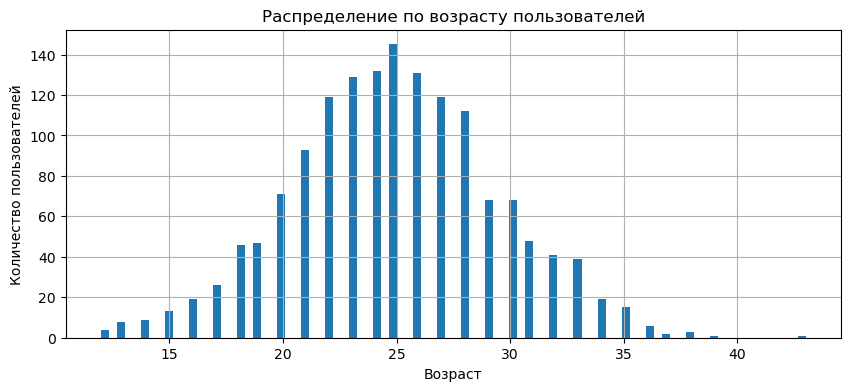

In [17]:
users['age'].hist(bins=44*2, figsize=(10, 4));
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение по возрасту пользователей');

Специфика сервиса вполне ожидаемая, средняя и медианная очень близки (25 лет) - т.к. сервисом самокатов больше всего пользуются люди от 20 до 30 лет (квартили чуть более строги - 22 и 28, соответственно). Самым младшим пользователям 12 лет, самым старшим 36+.

Посмотрим на расстоянияния поездок:

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


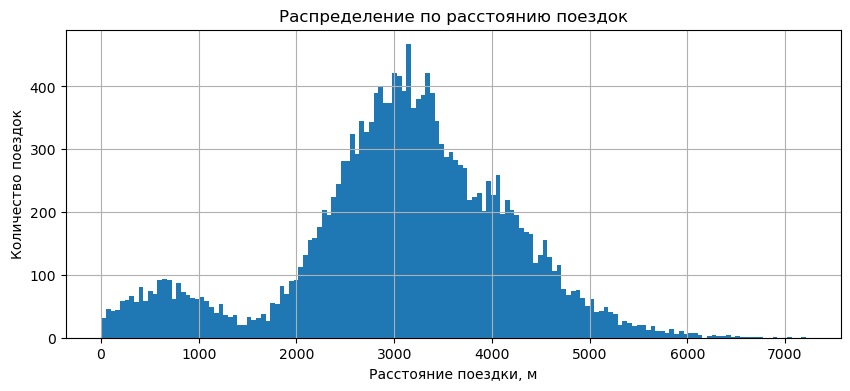

In [18]:
print(rides['distance'].describe())
rides['distance'].hist(bins=150, figsize=(10, 4));
plt.xlabel('Расстояние поездки, м')
plt.ylabel('Количество поездок')
plt.title('Распределение по расстоянию поездок');

Средняя 3070,66 м, медианная 3133,61 м. При этом минимальное значение меньше метра, а максимальное 7211. 

Рассмотрим продолжительность отдной поездки (измеряется в минутах):

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


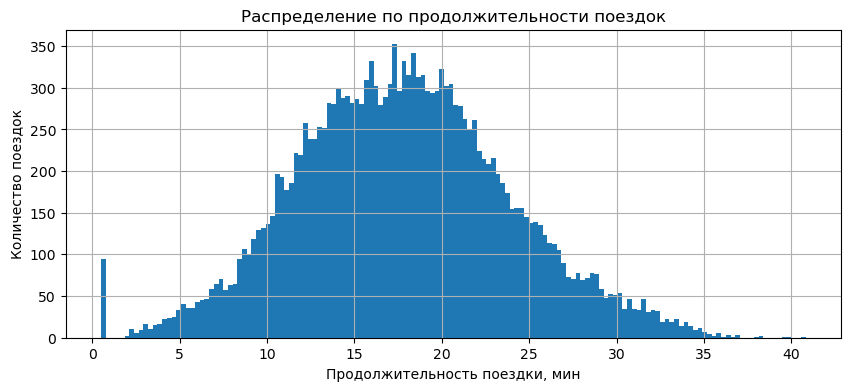

In [19]:
print(rides['duration'].describe())
rides['duration'].hist(bins=150, figsize=(10, 4));
plt.xlabel('Продолжительность поездки, мин')
plt.ylabel('Количество поездок')
plt.title('Распределение по продолжительности поездок');

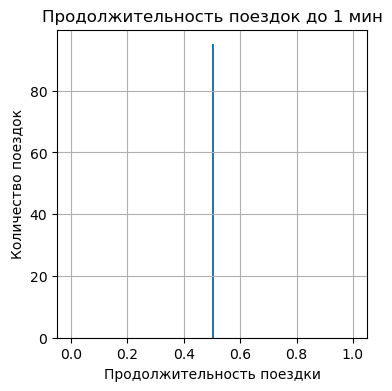

In [20]:
rides['duration'].hist(bins=150, range=(0, 1), figsize=(4, 4));
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.title('Продолжительность поездок до 1 мин');

Средняя 17,81, медианная 17,68. Максимальное значение 40,82, а вот около минимальной (0,5) подозрительный пик. Возможно это тот случай, когда пользователь хотел поехать, но передумал, или это могут быть тестовые запуски после обслуживания, зарядки. Проверим:

In [21]:
rides[rides['duration'] < 1].sort_values('distance')

,user_id,distance,duration,date,date_month
15132,1325,4030.308008,0.5,2021-12-22,12
17909,1524,4103.998874,0.5,2021-06-18,6
10692,1006,4106.278268,0.5,2021-10-31,10
9698,937,4169.066800,0.5,2021-12-12,12
14342,1268,4177.139336,0.5,2021-06-09,6
...,...,...,...,...,...
14574,1285,6316.574814,0.5,2021-09-25,9
13701,1224,6414.516026,0.5,2021-07-15,7
11385,1057,6601.197575,0.5,2021-02-07,2
17242,1477,6724.932981,0.5,2021-01-12,1


95 записей и все с расстояниями выше средних. Аномальные значения налицо - возможно, сбои в приложении или интернет-соединении.

**Вывод** 

При первичном рассмотрении наших данных мы выснили, рассматриваем 1534 польвователя (45,57% с подпиской, 54,43% без подписки) в 8 городах. Возраст пользователей ожидаемо распределён нормально, от 12 до 43 лёт (с квартилями 22 и 28 лет). На расстояния и времена поездок лучше смотреть раздельно для тарифов, чем мы и займёмся далее, заодно рассмотрев "природу" пиков этих графиков.

# 4. Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм. Для пользователей и поездок у нас есть общий столбец user_id, а для пользователей и подписок subscription_type:

In [22]:
data = rides.merge(users, on='user_id')
data_final = data.merge(subscriptions, on='subscription_type')
print(data_final.info())
data_final.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   date_month         18068 non-null  int32         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB
None


,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


Также, для удобства мы можем создать 2 датафрейма: один для тех у кого есть подписка, второй - у кого нет.

In [23]:
data_ultra = data_final.query('subscription_type == "ultra"').reset_index(drop=True)
print(data_ultra.shape[0])
data_ultra.head()

6500


,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [24]:
data_free = data_final.query('subscription_type == "free"').reset_index(drop=True)
print(data_free.shape[0])
data_free.head()

11568


,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
1,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
2,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
3,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
4,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


Никого не потеряли, при этом можем более подробно анализировать данные по каждой категории. Первый предварительный вывод - поездок без подписки намного больше, чем с подпиской (как и пользователей). Выгоду каждый определяет для себя сам, а мы можем визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий:

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


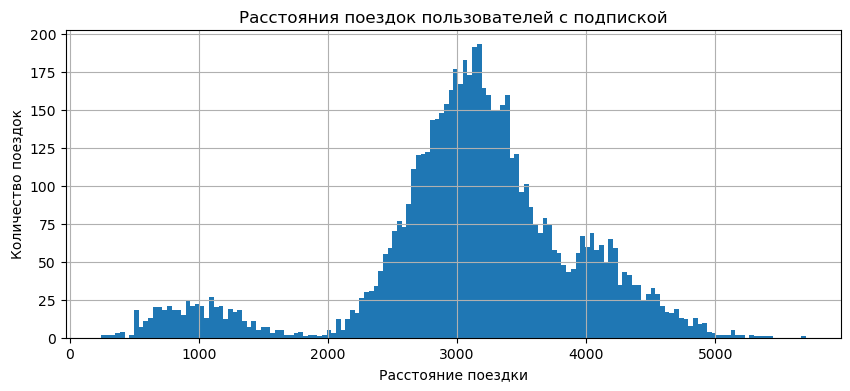

In [25]:
print(data_ultra['distance'].describe())
data_ultra['distance'].hist(bins=150, figsize=(10, 4));
plt.xlabel('Расстояние поездки')
plt.ylabel('Количество поездок')
plt.title('Расстояния поездок пользователей с подпиской');

Среднее расстояние поездок пользователей с подпиской 3115.45 м, медианное 3148.64 м, минимально 244.21 м, максимально 5699.77 м. При этом по графику видим, что  есть просадки в расстояниях 1500-2200 м.

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


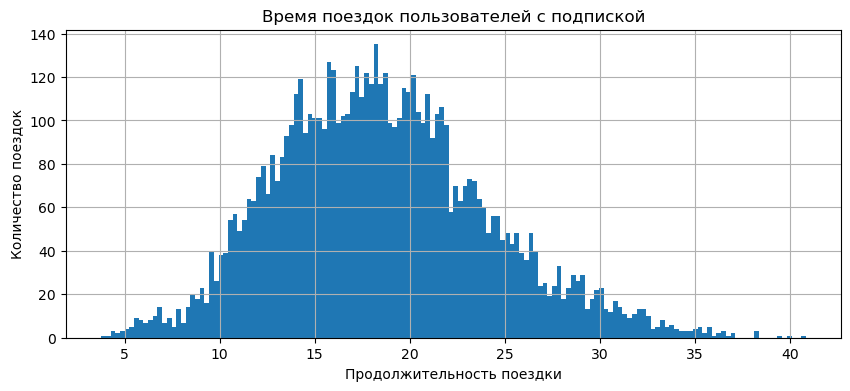

In [26]:
print(data_ultra['duration'].describe())
data_ultra['duration'].hist(bins=150, figsize=(10, 4));
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.title('Время поездок пользователей с подпиской');

Средняя продолжительность поездок 18.5 минут, медианная 18.2, минимальная 3.8, максимальная 40.8 - самая продолжительная поездка всё-таки совершена пользователем с подпиской.

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64


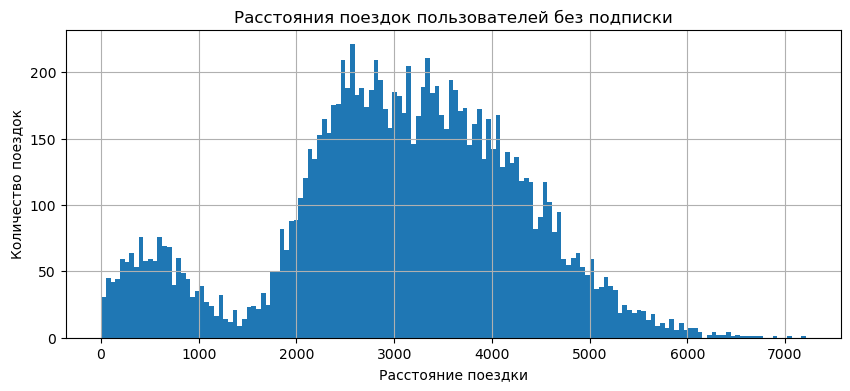

In [27]:
print(data_free['distance'].describe())
data_free['distance'].hist(bins=150, figsize=(10, 4));
plt.xlabel('Расстояние поездки')
plt.ylabel('Количество поездок')
plt.title('Расстояния поездок пользователей без подписки');

Среднее (3045.5 м) и медианное (3114.65 м) расстояния близки к тем, что совершают пользователи с подпиской, максимальное же больше - 7211 м, как и меньшее минимальное - 0.86 м. Можем предположить, что  совершать такие поездки (а точнее не совершать) могли новые пользователи сервиса, для которых сервис в новинку или недостаточно денежных средств на карте. Также имеются просадки на расстояниях около 1-2 км.

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64


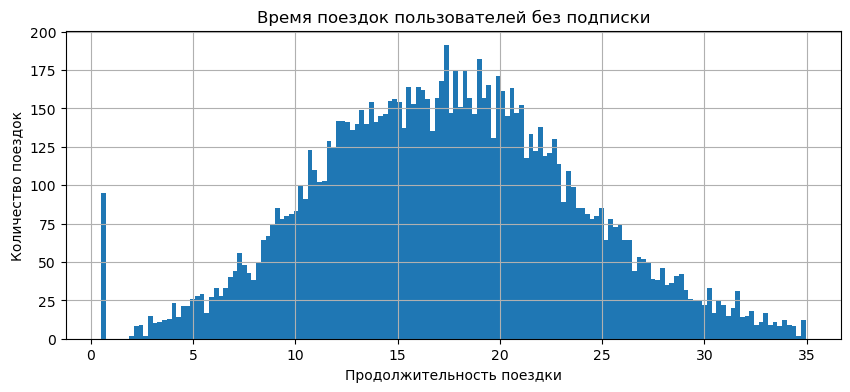

In [28]:
print(data_free['duration'].describe())
data_free['duration'].hist(bins=150, figsize=(10, 4))
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.title('Время поездок пользователей без подписки');

Средняя продолжительность 17.4 мин, медианная 17.3 - чуть меньше, чем у пользователей с подпиской. А вот те самые минимальные 0.5 минуты как раз у пользователей без подписки (возможно, это подтверждает предположение из предыдущего пункта - то есть возможные сбои подсчёта времени поездки были только у пользователей без подписки). Максимальная же продолжительность - почти 35 минут, как и близкие к ней значения, насчитыевает больше пользователей.

Для наглядности объединим графики расстояний и времени:

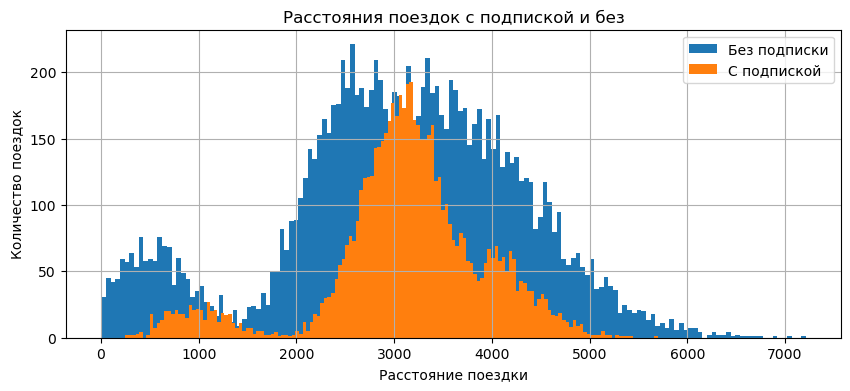

In [29]:
plt.subplots(figsize=(10, 4))
plt.hist(data_free['distance'], label="Без подписки", bins=150);
plt.hist(data_ultra['distance'], label="С подпиской", bins=150);
plt.title('Расстояния поездок с подпиской и без')
plt.xlabel('Расстояние поездки')
plt.ylabel('Количество поездок')
plt.legend()
plt.grid()

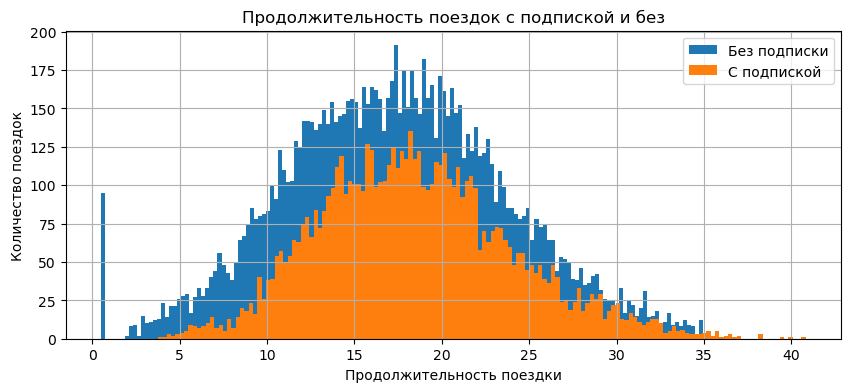

In [30]:
plt.subplots(figsize=(10, 4))
plt.hist(data_free['duration'], label="Без подписки", bins=150);
plt.hist(data_ultra['duration'], label="С подпиской", bins=150);
plt.title('Продолжительность поездок с подпиской и без')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.legend()
plt.grid()

На них более отчётливо видно, что поездок пользователей без подписки больше, чем пользователей с подпиской, и то, что распределения их очень схожи - значит схоже и поведение клиентов. С этой точки зрения, привлечение клиентов на оформление подписки выглядит логично, посмотрим по рассчётам - насколько целесообразно:

# 5. Подсчёт выручки

Посчитаем суммарную выручку от каждого пользователя. Т.к. по условиям тарифов продолжительность каждой поездки округляется до целого числа (к большему) - округлим столбец по методу "потолок", а расстояния округлим до 2 знаков после запятой.

In [31]:
data_final['duration'] = np.ceil(data_final['duration'])
data_final['distance'] = data_final['distance'].round(2)
data_ultra['duration'] = np.ceil(data_ultra['duration'])
data_ultra['distance'] = data_ultra['distance'].round(2)
data_free['duration'] = np.ceil(data_free['duration'])
data_free['distance'] = data_free['distance'].round(2)

Создадим датафрейм с аггрегированными данными о поездках: для каждого пользователя за каждый месяц найдём суммарное расстояние, суммарное время и количество поездок. Также добавим данные тарифов их подписок.

In [32]:
data_final_aggregated = data_final.groupby(['user_id', 'date_month']).agg({'distance':'sum', 'duration':['sum', 'count'],
                                                                           'start_ride_price':'first', 'minute_price':'first',
                                                                           'subscription_fee':'first',})
data_final_aggregated.columns = ['sum_distance', 'sum_duration', 'count_ride', 'start_price', 'minute_price', 'sub_price']
data_final_aggregated.reset_index(inplace=True)
data_final_aggregated.head(10)

,user_id,date_month,sum_distance,sum_duration,count_ride,start_price,minute_price,sub_price
0,1,1,7027.51,42.0,2,0,6,199
1,1,4,754.16,7.0,1,0,6,199
2,1,8,6723.47,46.0,2,0,6,199
3,1,10,5809.91,32.0,2,0,6,199
4,1,11,7003.50,56.0,3,0,6,199
5,1,12,6751.63,28.0,2,0,6,199
6,2,3,10187.73,63.0,3,0,6,199
7,2,4,6164.39,40.0,2,0,6,199
8,2,6,3255.34,14.0,1,0,6,199
9,2,7,6780.73,48.0,2,0,6,199


Добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Помесячная выручка считается по формуле: стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [33]:
data_final_aggregated['revenue'] = data_final_aggregated['start_price'] * data_final_aggregated['count_ride'] + \
data_final_aggregated['minute_price'] * data_final_aggregated['sum_duration'] + data_final_aggregated['sub_price']
print(data_final_aggregated.info())
data_final_aggregated.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       11331 non-null  int64  
 1   date_month    11331 non-null  int32  
 2   sum_distance  11331 non-null  float64
 3   sum_duration  11331 non-null  float64
 4   count_ride    11331 non-null  int64  
 5   start_price   11331 non-null  int64  
 6   minute_price  11331 non-null  int64  
 7   sub_price     11331 non-null  int64  
 8   revenue       11331 non-null  float64
dtypes: float64(3), int32(1), int64(5)
memory usage: 752.6 KB
None


,user_id,date_month,sum_distance,sum_duration,count_ride,start_price,minute_price,sub_price,revenue
0,1,1,7027.51,42.0,2,0,6,199,451.0
1,1,4,754.16,7.0,1,0,6,199,241.0
2,1,8,6723.47,46.0,2,0,6,199,475.0
3,1,10,5809.91,32.0,2,0,6,199,391.0
4,1,11,7003.50,56.0,3,0,6,199,535.0
5,1,12,6751.63,28.0,2,0,6,199,367.0
6,2,3,10187.73,63.0,3,0,6,199,577.0
7,2,4,6164.39,40.0,2,0,6,199,439.0
8,2,6,3255.34,14.0,1,0,6,199,283.0
9,2,7,6780.73,48.0,2,0,6,199,487.0


Таким образом мы получили датафрейм из 9 столбцов и 11331 строки с аггрегированными основными данными всех пользователей за каждый месяц, в котором они пользовались сервисом,  для дальнейших рассчётов.

# 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

## 6.1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

- Нулевая гипотеза: средние значения трат времени пользователей из двух групп равны.
- Альтернативная гипотеза: среднее значение трат времени пользователей с подпиской больше, чем среднее значение трат времени пользователей без подписки

In [34]:
ultra = data_ultra['duration']
free = data_free['duration']
alpha = 0.05
results = st.ttest_ind(ultra, free, alternative='greater')
1
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


Вполне логично, что пользователи с подпиской тратят больше времени, что мы видели и на графиках выше.

## 6.2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

- Нулевая гипотеза - среднее расстояние пользователя с подпиской больше 3130 метров
- Альтернативная гипотеза - среднее расстояние меньше 3130 метров

In [35]:
interested_value = 3130
ultra_di = data_ultra['distance']
alpha = 0.05 

results = st.ttest_1samp(ultra_di, interested_value, alternative='greater')

print('p-значение:', results.pvalue) 

if (results.pvalue < interested_value): 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195362605842414
Отвергаем нулевую гипотезу


Рассчёт подтвердил, что среднее расстояние за одну поездку у пользователей с подпиской меньше 3130 метров, то есть износ оптимальный. Как мы помним из графика и рассчёта выше, среднее 3115,45 м, а вот медианное было чуть больше - 3148,64 м. Пользователи с подпиской достаточно бережно используют прокатные самокаты.

## 6.3. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

- Нулевая гипотеза - средняя выручка от пользователей с подпиской равна или меньше, чем от пользователей без подписки
- Альтернативная гипотеза - средняя выручка от пользователей с подпиской выше, чем от пользователей без подписки

In [36]:
ultra_rev = data_final_aggregated[data_final_aggregated['sub_price'] == 199]['revenue']
free_rev = data_final_aggregated[data_final_aggregated['sub_price'] == 0]['revenue']
alpha = 0.05
results = st.ttest_ind(ultra_rev, free_rev, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Пользователи с подпиской ежемесячно приносят сервису больше прибыли, чем пользователи без подписки, не смотря даже на то, что их самих меньше, и поездок они совершают меньше.

## 6.4. Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?

Здесь речь идёт об анализе одной генеральной совокупности, с которой произошли некоторые изменения. В этом случае нужно проверять, равны ли средние совокупности до и после этого изменения. Гипотезы выглядели бы так:
- Нулевая - средние значения до обновления равны средним значениям после обновления
- Альтернативная - средние значения до обновления не равны средним значениям после обновления

Измеряемые значения количества обращений в этом случае будут зависимыми, парными - измеряется дважды для одних и тех же объектов. Методу scipy.stats.ttest_rel() передаются два параметра: наборы данных до и после. Оба набора должны быть одинаковыми по размеру: каждое измерение должно быть проведено до и после изменения.

## 6.5. Ради интереса проверим ещё пару гипотез:
- Проезжают ли пользователи с подпиской большие расстояния
- Оптимально ли используют самокаты клиенты без подписки

In [37]:
free_di = data_free['distance']
alpha = 0.05
results = st.ttest_ind(ultra_di, free_di, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Пользователи с подпиской проезжают большие расстояния')
else:
    print('Средние расстояния примерно равны')

p-value: 2.6587464744280608e-05
Пользователи с подпиской проезжают большие расстояния


In [38]:
interested_value = 3130
free_di = data_free['distance']
alpha = 0.05 

results = st.ttest_1samp(free_di, interested_value, alternative='less')

print('p-значение:', results.pvalue) 

if (results.pvalue < interested_value): 
    print('Пользователи без подписки используют оптимально')
else:
    print('Без подписки износ выше')

p-значение: 1.6095168660822524e-13
Пользователи без подписки используют оптимально


# **ВЫВОД** 

Подписка является выгодной как для пользователей, так и для самого сервиса. Пользователи с подпиской тратят больше времени на поездки, используют самокаты оптимально с точки зрения износа, и при этом приносят прибыли в среднем больше по месяцам, чем пользователи без подписки.

Продакт-менеджеры правильно полагают, что увеличение количества пользователей с подпиской увеличит прибыль сервиса, т.к. "подписчики" в среднем проезжают и большие расстояния, что не удивительно. А пользователи без подписок, не смотря на то, что их больше и совершают поездок они тоже больше, не "изнашивают" парк самокатов (по установленным компаниям рамкам износа от одной поездки). Проводя акции, в рамках которых пользователи без подписки (коих сейчас 54,43%, то есть аудитория вполне лояльная) будут переходить на "подписочный режим" сервис может получить больше прибыли при сохранении уровня издержек на обслуживание парка самокатов.